In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn


In [2]:
cust=pd.read_csv('Ecommerce Customers.csv')

In [3]:
cust.head()
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7A773ACF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001D7A8C6FDA0>]], dtype=object)

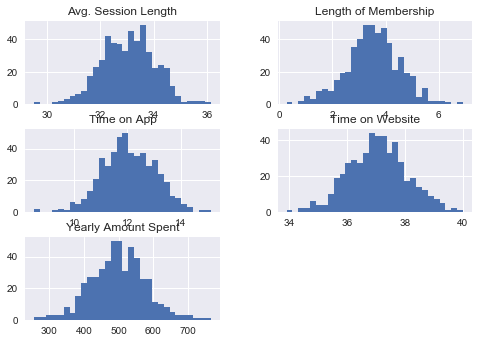

In [4]:
cust.hist(bins=30)

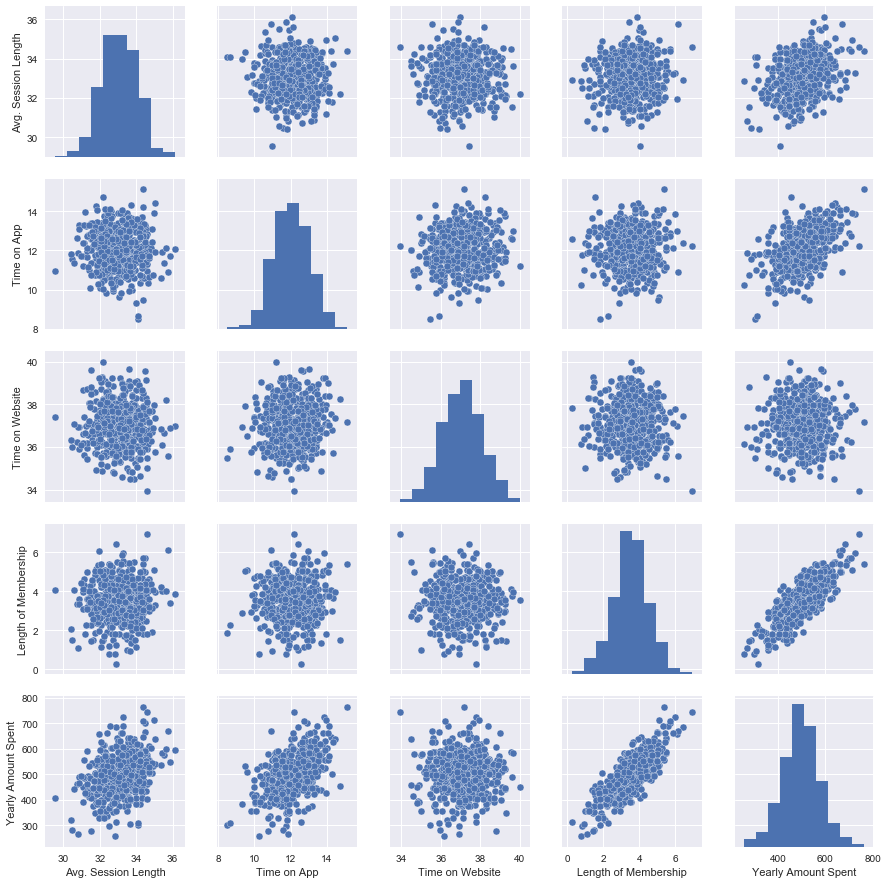

In [5]:
sns.pairplot(cust)

In [6]:
cust['length_of_rel_cat']=np.ceil(cust['Length of Membership'])

In [7]:
cust['length_of_rel_cat'].value_counts()

4.0    205
5.0    123
3.0    102
6.0     31
2.0     30
1.0      5
7.0      4
Name: length_of_rel_cat, dtype: int64

In [8]:
import sklearn
from sklearn.model_selection import StratifiedShuffleSplit

In [9]:
cust.head()



,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,length_of_rel_cat
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,5.0
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,3.0
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,5.0
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,4.0
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,5.0


In [10]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(cust,cust['length_of_rel_cat']):
    strat_train_set=cust.loc[train_index]
    strat_test_set =cust.loc[test_index]

In [11]:
strat_test_set['length_of_rel_cat'].value_counts()/len(strat_test_set)

4.0    0.41
5.0    0.25
3.0    0.20
6.0    0.06
2.0    0.06
1.0    0.01
7.0    0.01
Name: length_of_rel_cat, dtype: float64

In [12]:
strat_train_set['length_of_rel_cat'].value_counts()/len(strat_train_set)

4.0    0.4100
5.0    0.2450
3.0    0.2050
6.0    0.0625
2.0    0.0600
1.0    0.0100
7.0    0.0075
Name: length_of_rel_cat, dtype: float64

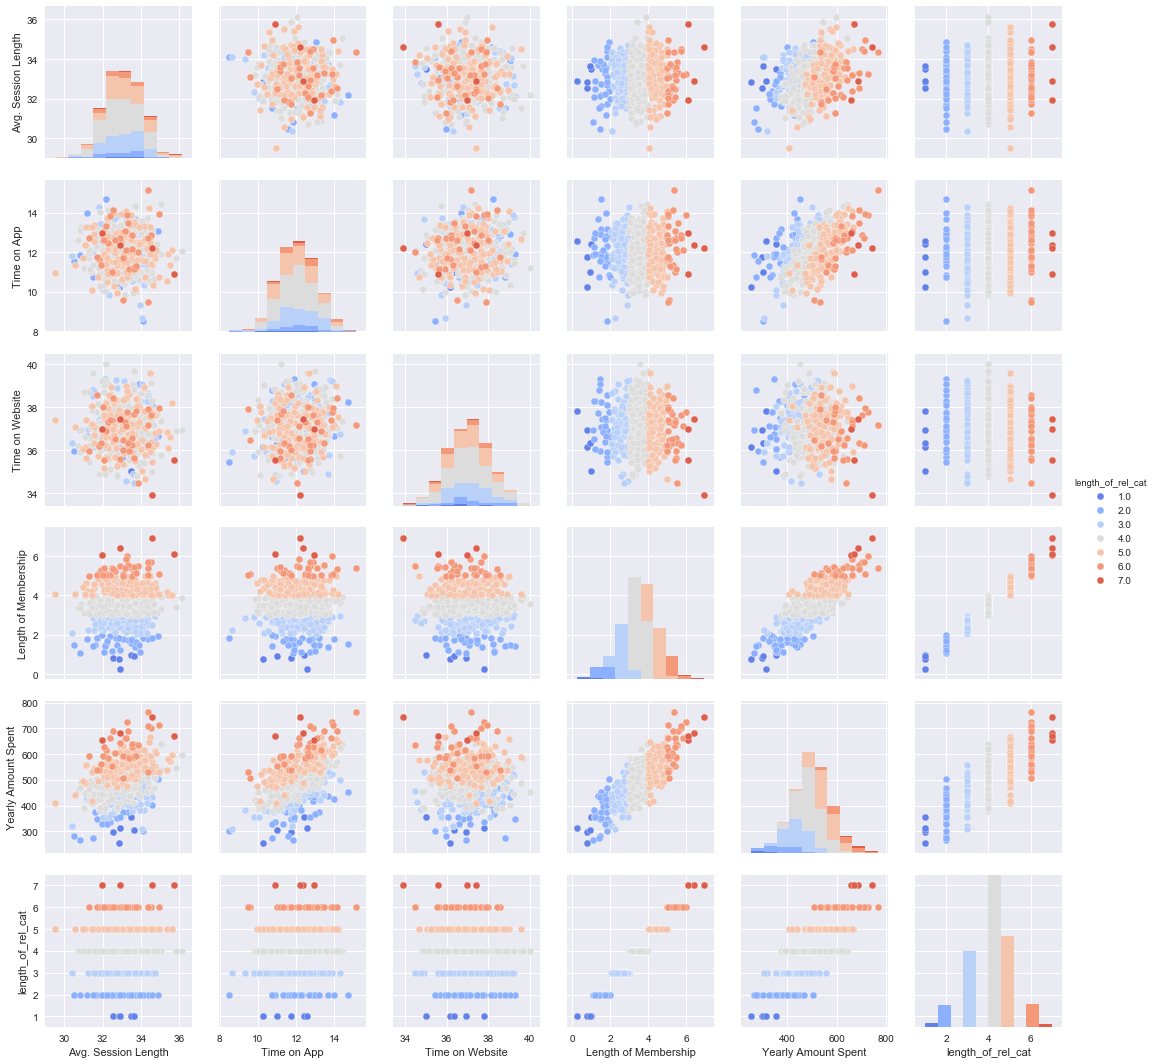

In [23]:
cust.head()
#sns.jointplot('Time on App','Time on Website',data=cust)
sns.pairplot(cust,hue='length_of_rel_cat',palette='coolwarm')

In [27]:
corr_matrix=cust.corr()
corr_matrix['Yearly Amount Spent'].sort_values(ascending=False)

Yearly Amount Spent     1.000000
Length of Membership    0.809084
length_of_rel_cat       0.776327
Time on App             0.499328
Avg. Session Length     0.355088
Time on Website        -0.002641
Name: Yearly Amount Spent, dtype: float64

C:\Users\sphulse\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7AF777898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001D7B1B6C278>]], dtype=object)

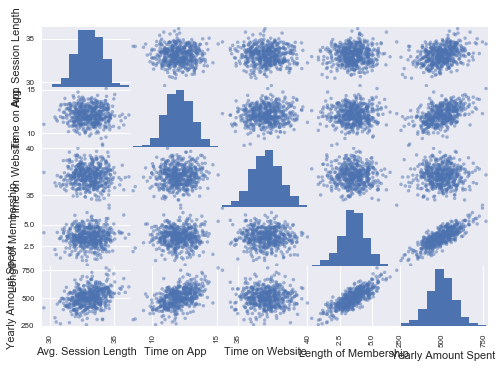

In [30]:
from pandas.tools.plotting import scatter_matrix
attributes=['Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']
scatter_matrix(cust[attributes])

In [32]:
cust.drop('length_of_rel_cat',axis=1,inplace=True)

In [38]:
cust.head()
cust['Total time spent']=cust['Time on App']+ cust['Time on Website']
cust['Avg Sess len 2']=cust['Total time spent']*cust['Avg. Session Length']/2
cust['Time spent_relationship_length']=cust['Avg Sess len 2']*cust['Length of Membership']
cust['Time spent_relationship_length']=cust['Avg. Session Length']*cust['Length of Membership']

In [39]:
corr_matrix=cust.corr()
corr_matrix['Yearly Amount Spent'].sort_values(ascending=False)

Yearly Amount Spent               1.000000
Time spent_relationship_length    0.836832
Length of Membership              0.809084
Time on App                       0.499328
Avg Sess len 2                    0.498171
Avg. Session Length               0.355088
Total time spent                  0.334801
Time on Website                  -0.002641
Name: Yearly Amount Spent, dtype: float64

In [ ]:
cust